In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import tensorflow as tf

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
imdp_path = "C:\\Users\\Ramy\\.keras\\datasets\\imdb_word_index.json"

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(path = imdp_path, num_words=max_features)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Ramy\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Ramy\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [5]:
print(len(x_train), 'train_sequences')
print(len(x_test), 'test sequences')

25000 train_sequences
25000 test sequences


In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [7]:
x_train.shape

(25000, 500)

In [8]:
x_test.shape

(25000, 500)

### training the model

In [27]:
from keras.layers import Dense, Embedding, SimpleRNN, Dropout
from keras.models import Sequential
import keras

In [29]:
model = keras.models.Sequential()
model.add(Embedding(max_features,32))
#adding multiple layers increases the performance of the network and consumes more memory usage.
# model.add(SimpleRNN(32, return_sequences = True))
# model.add(SimpleRNN(32, return_sequences = True))
# model.add(SimpleRNN(32, return_sequences = True))
model.add(SimpleRNN(32))
model.add(Dropout(0.5)) #to avoid overrfitting
model.add(Dense(1, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [32]:
fitting = model.fit(x_train, y_train, epochs= 5, batch_size = 64, validation_data = (x_test, y_test))

Epoch 1/5
391/391 [==============================] - 36s 93ms/step - loss: 4.2571 - acc: 0.5239 - val_loss: 0.7245 - val_acc: 0.5262
Epoch 2/5
391/391 [==============================] - 44s 113ms/step - loss: 4.2209 - acc: 0.6087 - val_loss: 0.6330 - val_acc: 0.6367
Epoch 3/5
391/391 [==============================] - 42s 109ms/step - loss: 4.1948 - acc: 0.6368 - val_loss: 0.7028 - val_acc: 0.5674
Epoch 4/5
391/391 [==============================] - 37s 96ms/step - loss: 4.1474 - acc: 0.6475 - val_loss: 0.5617 - val_acc: 0.7563
Epoch 5/5
391/391 [==============================] - 38s 97ms/step - loss: 4.1631 - acc: 0.6455 - val_loss: 0.5716 - val_acc: 0.7307


In [33]:
len(x_train)

25000

In [34]:
import matplotlib.pyplot as plt

In [35]:
acc = fitting.history['acc']
val_acc = fitting.history['val_acc']
loss = fitting.history['loss']
val_loss = fitting.history['val_loss']
epochs = range(1, len(acc) + 1)

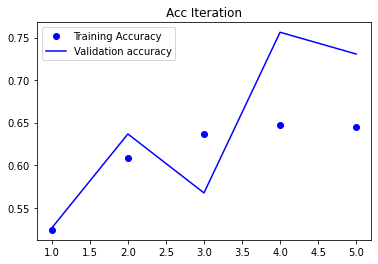

In [36]:
plt.plot(epochs, acc, 'bo', label= 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Acc Iteration')
plt.legend()

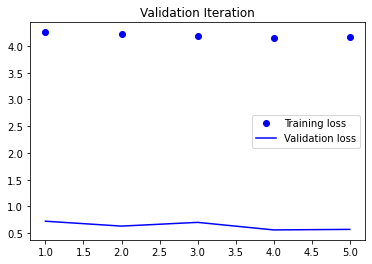

In [37]:
plt.plot(epochs, loss, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Iteration')
plt.legend()